In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msngo

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error, median_absolute_error

from cv_error import *

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('seaborn-darkgrid')

In [30]:
df = pd.read_csv('Datasets/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [31]:
df.drop(['zipcode', 'id', 'date'], axis = 1, inplace = True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [32]:
print(f'''La base de datos se compone de las siguientes observaciones
Numero de filas: {df.shape[0]}
Numero de columnas: {df.shape[1]}''')

La base de datos se compone de las siguientes observaciones
Numero de filas: 21613
Numero de columnas: 18


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

<AxesSubplot:>

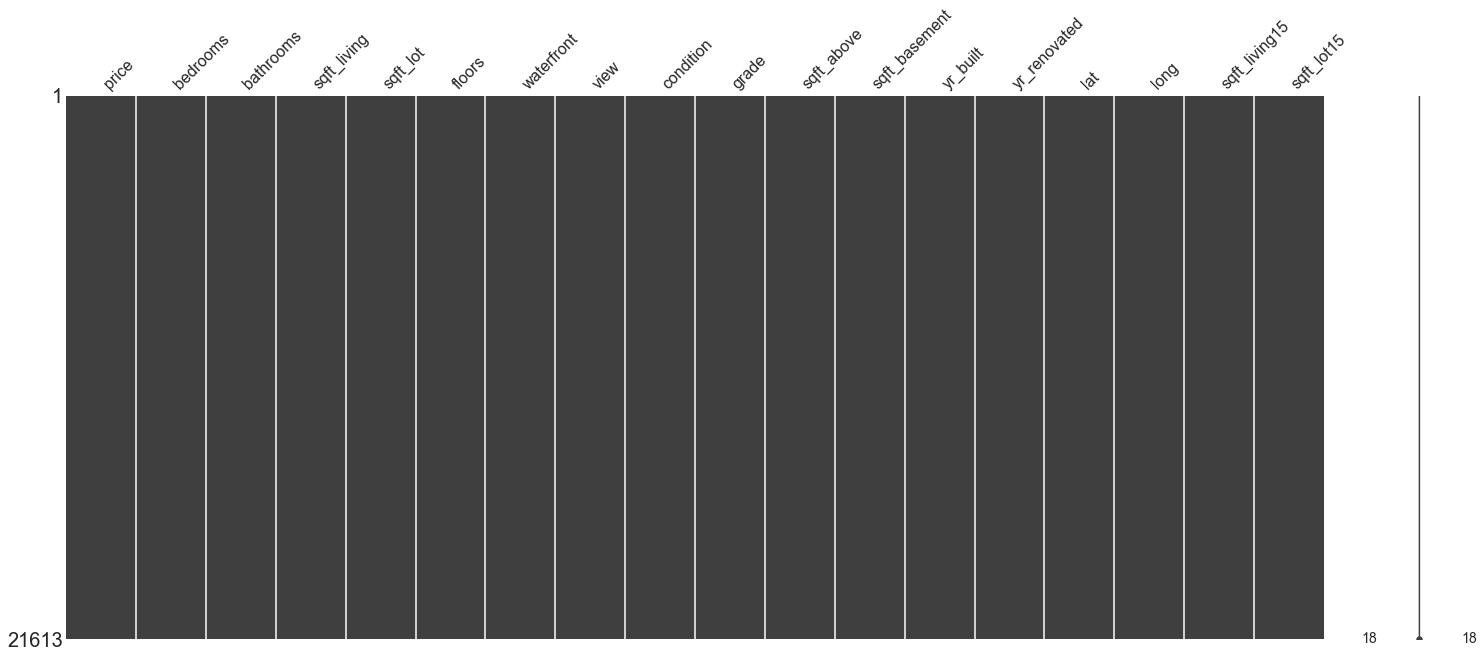

In [34]:
msngo.matrix(df)

In [35]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_scaled['price'] = np.log(df['price']).to_numpy()
df_scaled.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,12.309982,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,-0.352572,-0.306079,-0.943355,-0.260715
1,13.195614,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,1.161568,-0.746341,-0.432686,-0.187868
2,12.100712,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,1.283537,-0.135655,1.070140,-0.172375
3,13.311329,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,-0.283288,-1.271816,-0.914174,-0.284522
4,13.142166,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,0.409550,1.199335,-0.272190,-0.192849


Text(0.5, 1.0, 'Histograma Logaritmo del Presio')

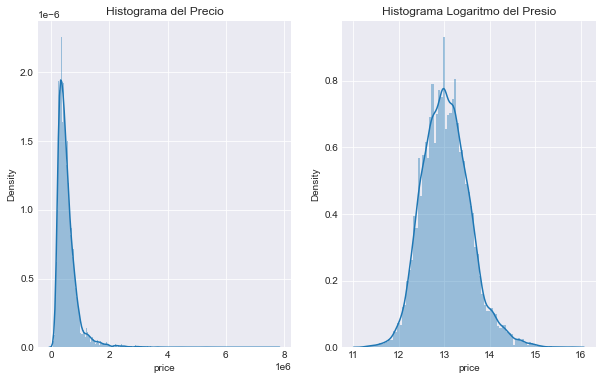

In [36]:
fig, ax = plt.subplots(1, 2)
sns.distplot(df['price'], bins = 'fd', ax = ax[0])
ax[0].set_title('Histograma del Precio')
sns.distplot(df_scaled['price'], bins = 'fd', ax = ax[1])
ax[1].set_title('Histograma Logaritmo del Presio')

#### Eleccion de hiperparametros

In [37]:
X = df_scaled.iloc[:, 1:]
N = X.shape[0]
X.insert(X.shape[1], 'intercept', np.ones(N))
y = df_scaled['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 15820)

In [38]:
y

0        12.309982
1        13.195614
2        12.100712
3        13.311329
4        13.142166
           ...    
21608    12.793859
21609    12.899220
21610    12.904459
21611    12.899220
21612    12.691580
Name: price, Length: 21613, dtype: float64

In [39]:
alphas = np.logspace(0, 7, base = 10)
alphas

array([1.00000000e+00, 1.38949549e+00, 1.93069773e+00, 2.68269580e+00,
       3.72759372e+00, 5.17947468e+00, 7.19685673e+00, 1.00000000e+01,
       1.38949549e+01, 1.93069773e+01, 2.68269580e+01, 3.72759372e+01,
       5.17947468e+01, 7.19685673e+01, 1.00000000e+02, 1.38949549e+02,
       1.93069773e+02, 2.68269580e+02, 3.72759372e+02, 5.17947468e+02,
       7.19685673e+02, 1.00000000e+03, 1.38949549e+03, 1.93069773e+03,
       2.68269580e+03, 3.72759372e+03, 5.17947468e+03, 7.19685673e+03,
       1.00000000e+04, 1.38949549e+04, 1.93069773e+04, 2.68269580e+04,
       3.72759372e+04, 5.17947468e+04, 7.19685673e+04, 1.00000000e+05,
       1.38949549e+05, 1.93069773e+05, 2.68269580e+05, 3.72759372e+05,
       5.17947468e+05, 7.19685673e+05, 1.00000000e+06, 1.38949549e+06,
       1.93069773e+06, 2.68269580e+06, 3.72759372e+06, 5.17947468e+06,
       7.19685673e+06, 1.00000000e+07])

In [40]:
names_regressors = X_train.columns

In [41]:
coefs_ridge = []
cv_err_ridge = []
model_ridge = Ridge(fit_intercept = True)
X_train.to_numpy()
y_train.to_numpy()

array([12.4874851 , 12.79385931, 12.89420728, ..., 12.7512997 ,
       13.17115354, 13.24458101])

In [42]:
for a in alphas:
        model_ridge.set_params(alpha = a)
        model_ridge.fit(X_train, y_train)
        coefs_ridge.append(model_ridge.coef_)
        dummy, cv_err_estimates = cv_error(X_train, y_train, k = 10, method = 'ridge', alpha = a)
        cv_err_ridge.append(np.mean(cv_err_estimates))

AttributeError: 'DataFrame' object has no attribute 'as_matrix'